In [33]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [34]:
# load the data
from sklearn.datasets import load_breast_cancer

In [35]:
# load the data
data = load_breast_cancer()

# check type of data
type(data)

sklearn.utils._bunch.Bunch

In [36]:
print(data.keys())
print(data.data.shape)
# print(data.target)
print(data.target_names)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
(569, 30)
['malignant' 'benign']


In [37]:
data.data.shape

(569, 30)

In [38]:
# split into train and test sets
Xtrain, Xtest, Ytrain, Ytest = train_test_split(
    data.data,
    data.target,
    test_size=0.33
)

# standardize the data
scaler = StandardScaler()
# we scale the train set
Xtrain = scaler.fit_transform(Xtrain)
# then apply the same transformation to the test set
Xtest = scaler.transform(Xtest)

Xtrain = torch.from_numpy(Xtrain.astype(np.float32))
Xtest = torch.from_numpy(Xtest.astype(np.float32))
Ytrain = torch.from_numpy(Ytrain.astype(np.float32)).reshape(-1, 1)
Ytest = torch.from_numpy(Ytest.astype(np.float32)).reshape(-1, 1)

In [39]:
# extract size of data
N, D = Xtrain.shape

# create the model
model = nn.Sequential(
    nn.Linear(D, 1),  # input layer
    nn.Sigmoid()      # output layer
)

In [40]:
# loss and optimizer
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters())

# train the model
n_epochs = 1000
losses_train = np.zeros(n_epochs)
losses_test = np.zeros(n_epochs)

for it in range(n_epochs):
    # zero the parameter gradients
    optimizer.zero_grad()

    # forward pass: inference and calculate loss
    outputs = model(Xtrain)
    loss = criterion(outputs, Ytrain)

    # gradient descent
    loss.backward()
    optimizer.step()

    outputs_test = model(Xtest)
    loss_test = criterion(outputs_test, Ytest)

    losses_train[it] = loss.item()
    losses_test[it] = loss_test.item()

    if (it + 1) % 50 == 0:
        print(f"epoch {it+1}/{n_epochs}\t\ttrain loss: {loss:.3f}\ttest loss: {loss_test:.3f}")

epoch 50/1000		train loss: 0.699	test loss: 0.710
epoch 100/1000		train loss: 0.484	test loss: 0.476
epoch 150/1000		train loss: 0.375	test loss: 0.359
epoch 200/1000		train loss: 0.309	test loss: 0.293
epoch 250/1000		train loss: 0.266	test loss: 0.249
epoch 300/1000		train loss: 0.234	test loss: 0.219
epoch 350/1000		train loss: 0.211	test loss: 0.197
epoch 400/1000		train loss: 0.192	test loss: 0.180
epoch 450/1000		train loss: 0.177	test loss: 0.166
epoch 500/1000		train loss: 0.165	test loss: 0.156
epoch 550/1000		train loss: 0.154	test loss: 0.147
epoch 600/1000		train loss: 0.146	test loss: 0.140
epoch 650/1000		train loss: 0.138	test loss: 0.134
epoch 700/1000		train loss: 0.132	test loss: 0.129
epoch 750/1000		train loss: 0.126	test loss: 0.124
epoch 800/1000		train loss: 0.121	test loss: 0.120
epoch 850/1000		train loss: 0.116	test loss: 0.117
epoch 900/1000		train loss: 0.112	test loss: 0.114
epoch 950/1000		train loss: 0.108	test loss: 0.112
epoch 1000/1000		train loss: 0.1

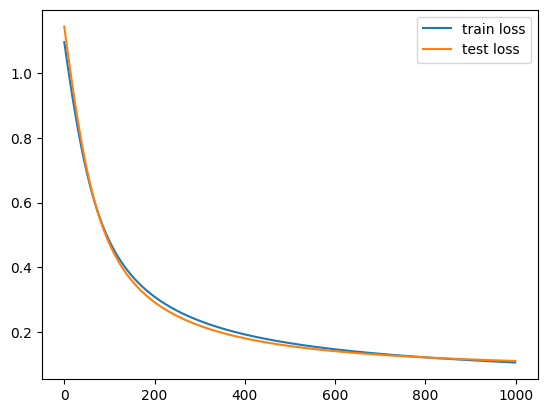

In [41]:
plt.plot(losses_train, label='train loss')
plt.plot(losses_test, label='test loss')
plt.legend()
plt.show()

In [42]:
# evaluating the model
with torch.no_grad():
    p_train = model(Xtrain)
    p_train = np.round(p_train.numpy())
    train_acc = np.mean(Ytrain.numpy() == p_train)

    p_test = model(Xtest)
    p_test = np.round(p_test.numpy())
    test_acc = np.mean(Ytest.numpy() == p_test)
print(f'Train accuracy: {train_acc:.3f}\tTest accuracy: {test_acc:.3f}')

Train accuracy: 0.984	Test accuracy: 0.963


# Saving our model